In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification #используется для генерации случайных данных для задачи классификации
X,y = make_classification (n_samples=1000, # количество образцов данных, которые нужно сгенерировать
                          n_features=2, # количество признаков в каждом образце данных.
                          n_informative=2, # количество информативных признаков в каждом образце данных
                          n_redundant=0, #количество избыточных признаков в каждом образце данных.
                          n_classes=2, #количество классов, которые нужно сгенерировать
                          class_sep=2, #классы будут отделены на расстояние, равное 2 стандартным отклонениям.
                          random_state=1) #означает, что генератор случайных чисел будет инициализирован определенным образом и каждый раз, когда мы будем использовать эту функцию, будут генерироваться одни и те же данные

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


In [ ]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,0
3,0
4,1


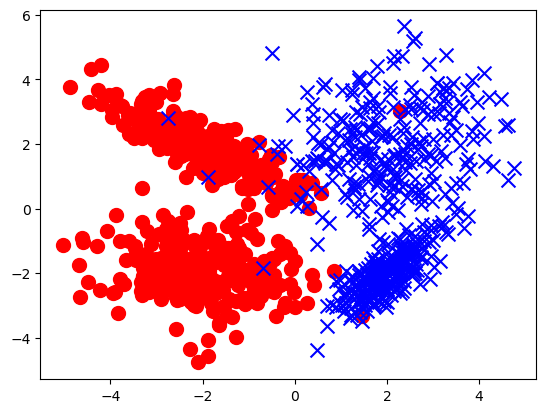

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c="r", s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c="b", s=100)
plt.show()

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):
        return 1. / (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [ ]:
logreg = LogReg()

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [ ]:
pd.DataFrame(X).head()

,0,1,2
0,1.0,1.863411,0.087646
1,1.0,-1.530997,1.901182
2,1.0,-0.017224,-2.591112
3,1.0,-2.032039,-1.801162
4,1.0,4.620555,0.901124


In [ ]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [ ]:
y_pred

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
       False,  True,

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.5f} F1-score = {f1:.5f}")

accuracy = 0.97600 F1-score = 0.97614


In [ ]:
y_pred_proba = logreg.predict_proba(X)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [ ]:
xx

array([[-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       ...,
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961],
       [-6.03367039, -6.02367039, -6.01367039, ...,  5.72632961,
         5.73632961,  5.74632961]])

In [ ]:
yy

array([[-5.76154392, -5.76154392, -5.76154392, ..., -5.76154392,
        -5.76154392, -5.76154392],
       [-5.75154392, -5.75154392, -5.75154392, ..., -5.75154392,
        -5.75154392, -5.75154392],
       [-5.74154392, -5.74154392, -5.74154392, ..., -5.74154392,
        -5.74154392, -5.74154392],
       ...,
       [ 6.60845608,  6.60845608,  6.60845608, ...,  6.60845608,
         6.60845608,  6.60845608],
       [ 6.61845608,  6.61845608,  6.61845608, ...,  6.61845608,
         6.61845608,  6.61845608],
       [ 6.62845608,  6.62845608,  6.62845608, ...,  6.62845608,
         6.62845608,  6.62845608]])

In [ ]:
XX

array([[ 1.        , -6.03367039, -5.76154392],
       [ 1.        , -6.02367039, -5.76154392],
       [ 1.        , -6.01367039, -5.76154392],
       ...,
       [ 1.        ,  5.72632961,  6.62845608],
       [ 1.        ,  5.73632961,  6.62845608],
       [ 1.        ,  5.74632961,  6.62845608]])

In [ ]:
Z = logreg.predict_proba(XX)
print(Z.shape)
Z = Z.reshape(xx.shape)

(1461960,)


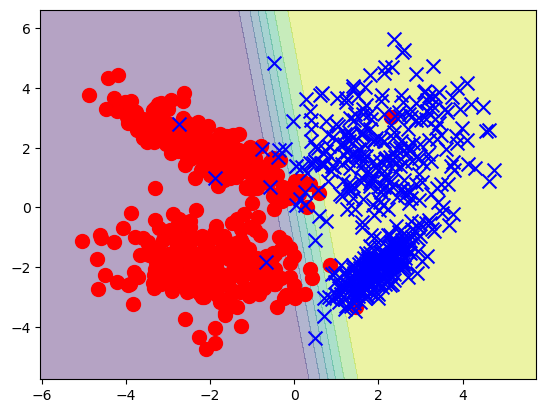

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [ ]:
ac = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"accuracy = {ac:.5f} F1-score = {f1:.5f}")

accuracy = 0.97500 F1-score = 0.97630


1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

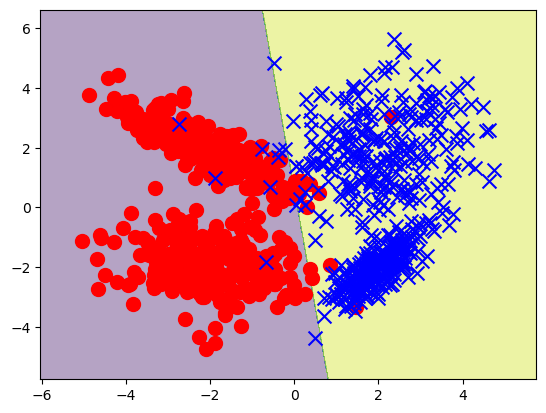

In [ ]:
z1 = model.predict(XX)
z1 = z1.reshape(xx.shape)
plt.contourf(xx, yy, z1, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100);

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):
        return 1./ (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1./n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    def find_min_alpha(self, X, Y):
        self._alpha = 1000
        def error(X, Y, B):
            return 1/X.shape[0] * sum(-Y*np.log(self.sigmoid(X, B)) - (1-Y)*(1-np.log(self.sigmoid(X, B))))
        for i in range(1000):
            B = np.ones(X.shape[1])
            prev_error = error(X, Y, B)
            B = self.gradient_step(B, self.grad_func(X, Y, B))
            if prev_error > error(X, Y, B):
                return self._alpha
            else:
                self._alpha -= (1 if alpha > 1 else 0.01)


In [ ]:
logreg2 = LogReg()
logreg2.find_min_alpha(X,y)

C:\Users\user\AppData\Local\Temp\ipykernel_17324\3073451012.py:21: RuntimeWarning: overflow encountered in exp
  return 1./ (1. + np.exp(-X.dot(theta)))
C:\Users\user\AppData\Local\Temp\ipykernel_17324\3073451012.py:34: RuntimeWarning: divide by zero encountered in log
  return 1/X.shape[0] * sum(-Y*np.log(self.sigmoid(X, B)) - (1-Y)*(1-np.log(self.sigmoid(X, B))))
C:\Users\user\AppData\Local\Temp\ipykernel_17324\3073451012.py:34: RuntimeWarning: invalid value encountered in multiply
  return 1/X.shape[0] * sum(-Y*np.log(self.sigmoid(X, B)) - (1-Y)*(1-np.log(self.sigmoid(X, B))))


157

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.0001, 0.001, 0.01, 0.2, 1, 10]
accuracies = []

for alpha in alphas:
    logreg = LogReg(alpha=alpha)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

best_alpha = alphas[np.argmax(accuracies)]
print(f"Best alpha: {best_alpha}")

Best alpha: 0.01


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):
        return 1./ (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1./n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=1,
                          random_state=1)

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

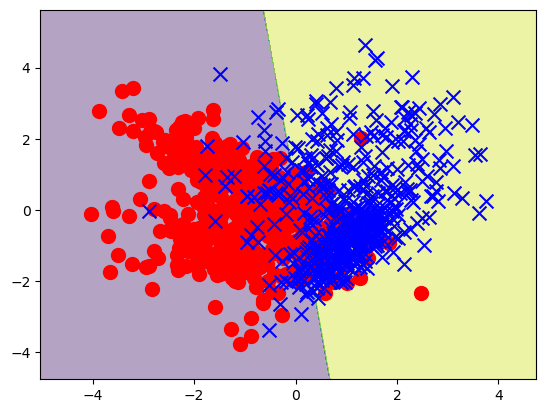

In [ ]:
z1 = model.predict(XX)
z1 = z1.reshape(xx.shape)
plt.contourf(xx, yy, z1, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
ac = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"accuracy = {ac:.5f} F1-score = {f1:.5f}")

accuracy = 0.85500 F1-score = 0.86256


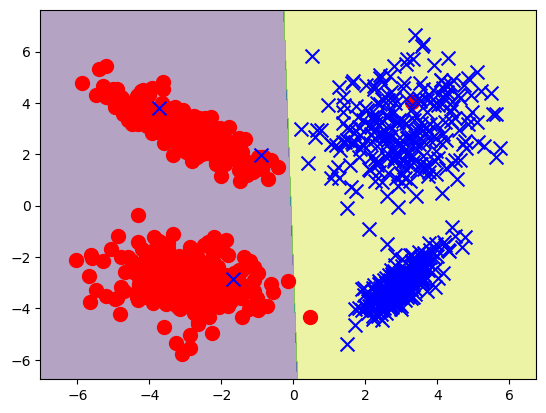

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=3,
                          random_state=1)

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
z1 = model.predict(XX)
z1 = z1.reshape(xx.shape)
plt.contourf(xx, yy, z1, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
ac = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"accuracy = {ac:.5f} F1-score = {f1:.5f}")

accuracy = 1.00000 F1-score = 1.00000


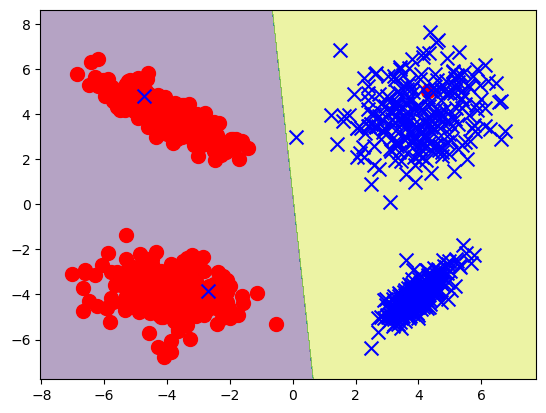

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=4,
                          random_state=1)

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
z1 = model.predict(XX)
z1 = z1.reshape(xx.shape)
plt.contourf(xx, yy, z1, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
ac = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"accuracy = {ac:.5f} F1-score = {f1:.5f}")

accuracy = 1.00000 F1-score = 1.00000


5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=6,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {accuracy:.5f} F1-score = {f1:.5f}")

accuracy = 0.98200 F1-score = 0.98193


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
        return theta
    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):
        return 1./ (1. + np.exp(-X.dot(theta)))
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1./n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    def fit_one_vs_all(self, X, y):
        # X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        unique_labels = np.unique(y)
        models = {}
        for label in unique_labels:
            y_binary = np.where(y == label, 1, 0)
            model = LogReg(alpha=self._alpha, n_iters=self._n_iters)
            model.fit(X, y_binary)
            models[label] = model
        self.models = models
    def predict_one_vs_all(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        y_pred = np.zeros(X.shape[0])
        for label, model in self.models.items():
            y_proba = model.predict_proba(X)
            y_pred_label = np.where(y_proba > 0.5, label, 0)
            y_pred += y_pred_label
        return y_pred

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=3,
                            n_clusters_per_class=1,
                            class_sep=2,
                            random_state=1)

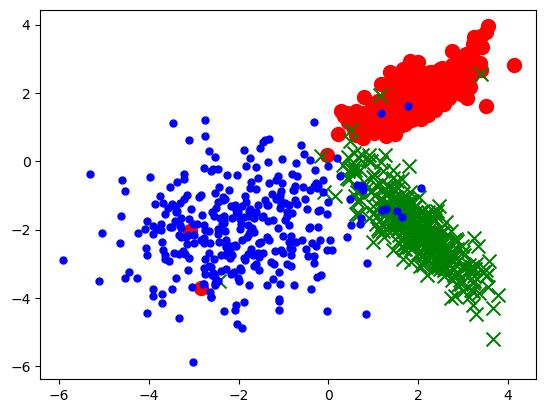

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c="r", s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c="g", s=100)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], marker=".", c="b", s=100)
plt.show()

In [ ]:
log_ova = LogReg()
log_ova.fit_one_vs_all(X, y)
ac = accuracy_score(y, log_ova.predict_one_vs_all(X))
print(f"accuracy = {ac:.5f}")

accuracy = 0.92100


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)
ac = accuracy_score(y_test, y_pred_lr)
print(f"accuracy = {ac:.5f}")

accuracy = 0.96500


7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            n_clusters_per_class=1,
                            class_sep=2,
                            random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
ac = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"accuracy = {ac:.5f} F1-score = {f1:.5f}")

accuracy = 0.98500 F1-score = 0.98361


In [ ]:
model.predict_proba(X)

array([[9.78150490e-05, 9.99902185e-01],
       [1.32196121e-03, 9.98678039e-01],
       [1.98276530e-03, 9.98017235e-01],
       ...,
       [4.65811269e-07, 9.99999534e-01],
       [9.96679346e-01, 3.32065440e-03],
       [9.98560764e-01, 1.43923580e-03]])

In [ ]:
print(9.78150490e-05 + 9.99902185e-01)

1.0000000000490001


In [ ]:
model.predict(X)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,